In [4]:
import torch as th

embed_dim = 512
num_heads = 8
B = 10
L_target = 100
L_source = 30
query = th.rand(B, L_target, embed_dim)  # (N, L, E) where N is batch size, L is target sequence length, E is embedding dimension
key = th.rand(B, L_source, embed_dim)    # (N, S, E) where S is source sequence length
value = th.rand(B, L_source, embed_dim)  # (N, S, E)

multihead_attn = th.nn.MultiheadAttention(embed_dim, num_heads, batch_first=True)
attn_output, attn_output_weights = multihead_attn(query, key, value)
print(attn_output.shape)  # should be (B, L_target, embed_dim)
print(attn_output_weights.shape)  # should be (B, L_target, L_source)

torch.Size([10, 100, 512])
torch.Size([10, 100, 30])


(720, 1280, 4)


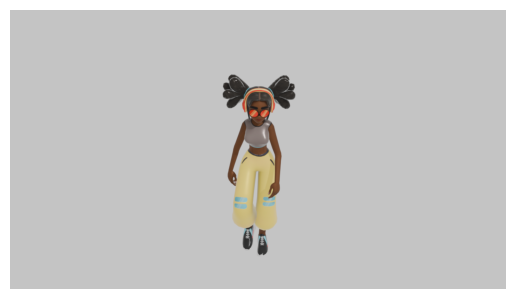

In [14]:
data = "/data/mint/Motion_Dataset/Mixamo/output_mixamo_720p/Walking/cam_0/frame0000.png"
from PIL import Image
image = Image.open(data)
print(np.array(image).shape)
import matplotlib.pyplot as plt
plt.imshow(image)
plt.axis('off')
plt.show()


In [6]:
import numpy as np
x = np.load("./motion_pred_3d_Wan2.2-TI2V-5B_frame0000.npy")
# Plot animated 3D scatter plot (T, J, 3)
import plotly.graph_objects as go
from plotly.subplots import make_subplots
T, J, _ = x.shape
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'scatter3d'}]])
scatter = go.Scatter3d(x=x[0, :, 0], y=x[0, :, 1], z=x[0, :, 2], mode='markers')
fig.add_trace(scatter, row=1, col=1)
frames = [go.Frame(data=[go.Scatter3d(x=x[t, :, 0], y=x[t, :, 1], z=x[t, :, 2], mode='markers')],
                   name=f'frame{t}') for t in range(T)]
fig.frames = frames
fig.update_layout(updatemenus=[dict(type='buttons', showactive=False,
                                    buttons=[dict(label='Play', method='animate',
                                                  args=[None, {'frame': {'duration': 100, 'redraw': True},
                                                               'fromcurrent': True}])])])
fig.show()